In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# import restaurant and review data from github
url1 = 'https://raw.githubusercontent.com/avesselinov/Project1/main/DATA/philly_restaurants_2.csv'
df_rest = pd.read_csv(url1)

url2 = 'https://raw.githubusercontent.com/avesselinov/Project1/main/DATA/philly_reviews.csv'
df_rev = pd.read_csv(url2)

In [ ]:
#look at dataframes
df_rest.head()

,Unnamed: 0,business_id,name,full_address,latitude,longitude,stars,review_count,price_level
0,0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,"935 Race St, Philadelphia, PA, 19107",39.955505,-75.155564,4.0,80,1
1,1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,"205 Race St, Philadelphia, PA, 19106",39.953949,-75.143226,4.0,245,3
2,2,ROeacJQwBeh05Rqg7F6TCg,BAP,"1224 South St, Philadelphia, PA, 19147",39.943223,-75.162568,4.5,205,1
3,3,QdN72BWoyFypdGJhhI5r7g,Bar One,"767 S 9th St, Philadelphia, PA, 19147",39.939825,-75.157447,4.0,65,1
4,4,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,"901 N Delaware Ave, Philadelphia, PA, 19123",39.962582,-75.135657,3.5,65,2


In [ ]:
df_rev.head()

,Unnamed: 0,review_id,business_id,stars,text,date
0,13,8JFGBuHMoiNDyfcxuWNtrA,RZtGWDLCAtuipwaZ-UfjmQ,4.0,Good food--loved the gnocchi with marinara\nth...,2009-10-14 19:57:14
1,16,oyaMhzBSwfGgemSGuZCdwQ,YtSqYv1Q_pOltsVPSx54SA,5.0,Tremendous service (Big shout out to Douglas) ...,2013-06-24 11:21:25
2,19,Xs8Z8lmKkosqW5mw_sVAoA,eFvzHawVJofxSnD7TgbZtg,5.0,My absolute favorite cafe in the city. Their b...,2014-11-12 15:30:27
3,49,cvQXRFLCyr0S7EgFb4lZqw,EtKSTHV5Qx_Q7Aur9o4kQQ,5.0,"On a scale of one to things that are awesome, ...",2009-10-14 01:15:04
4,51,r2IBPY_E8AE5_GpsqlONyg,VJEzpfLs_Jnzgqh5A_FVTg,4.0,It was my fiance's birthday and he decided he ...,2014-04-01 13:05:18


In [ ]:
url3 = 'https://raw.githubusercontent.com/avesselinov/Project1/main/OUTPUT/restaurant_sentiment_scores.csv'
df = pd.read_csv(url3)
df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,price_level,sentiment_score
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,0.695723
1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,3,0.803010
2,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,0.855654
3,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,1,0.846458
4,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,901 N Delaware Ave,Philadelphia,PA,19123,39.962582,-75.135657,3.5,65,2,0.626327
...,...,...,...,...,...,...,...,...,...,...,...,...
811,cd-EkTwPP0G-bOoZtRTaVA,Tony Lukes Casa De Pasta,26 East Oregon Ave,Philadelphia,PA,19148,39.913628,-75.148815,4.5,7,2,0.773086
812,Ww8DBKYd-NSRMfDRuddrjA,Sushi Kingdom,427 Franklin Mills Cir,Philadelphia,PA,19154,40.086031,-74.964971,3.5,41,2,0.610952
813,9AE75wIWF9XiV23NBpHyVA,Corfu Pizza,6730 Old York Rd,Philadelphia,PA,19126,40.056005,-75.140606,3.0,21,1,0.499050
814,wB1Tin0OW1JRpaKM-E3ZYA,National Mechanics,22 S 3rd St,Philadelphia,PA,19106,39.949544,-75.145987,4.0,875,2,0.766194


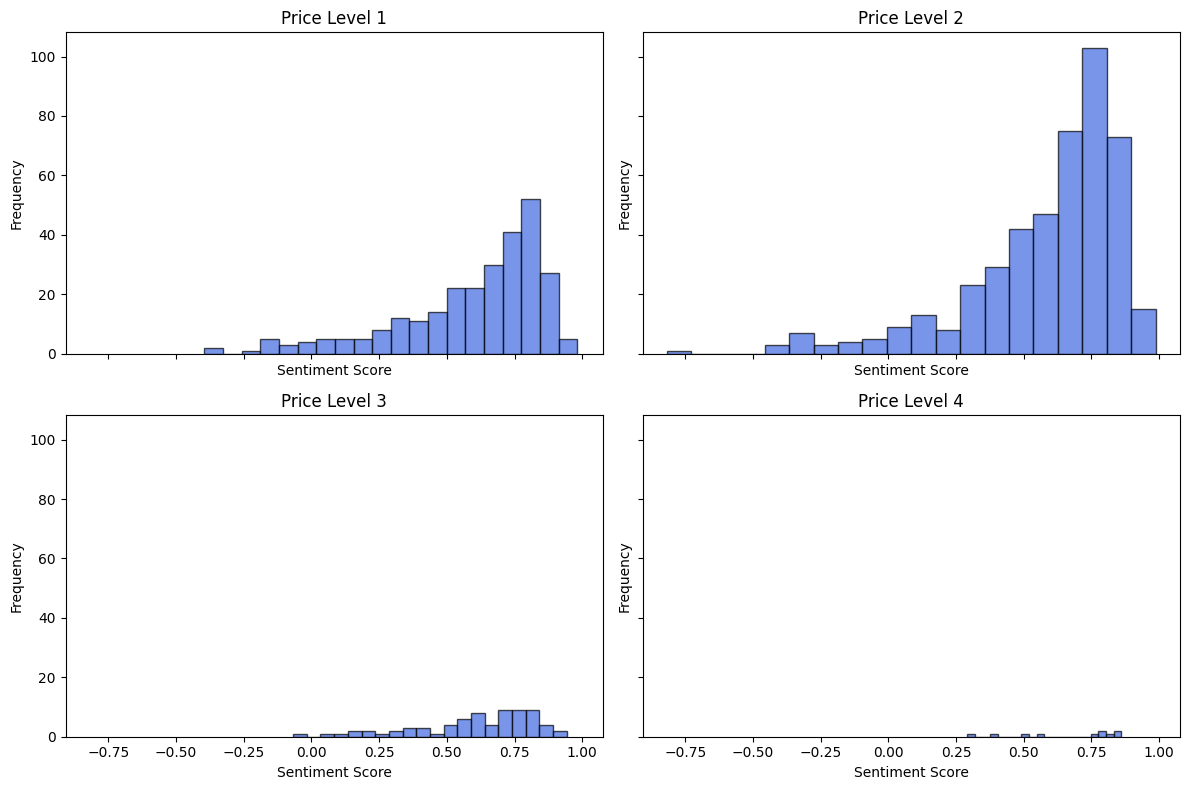

In [ ]:
# Define the figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)  # 2x2 grid

# Loop through price levels and create a histogram for each
for i, price in enumerate(sorted(df['price_level'].unique())):
    ax = axes[i // 2, i % 2]  # Position in 2x2 grid
    subset = df[df['price_level'] == price]  # Filter for price level

    ax.hist(subset['sentiment_score'], bins=20, alpha=0.7, color='royalblue', edgecolor='black')
    ax.set_title(f'Price Level {price}')
    ax.set_xlabel('Sentiment Score')
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

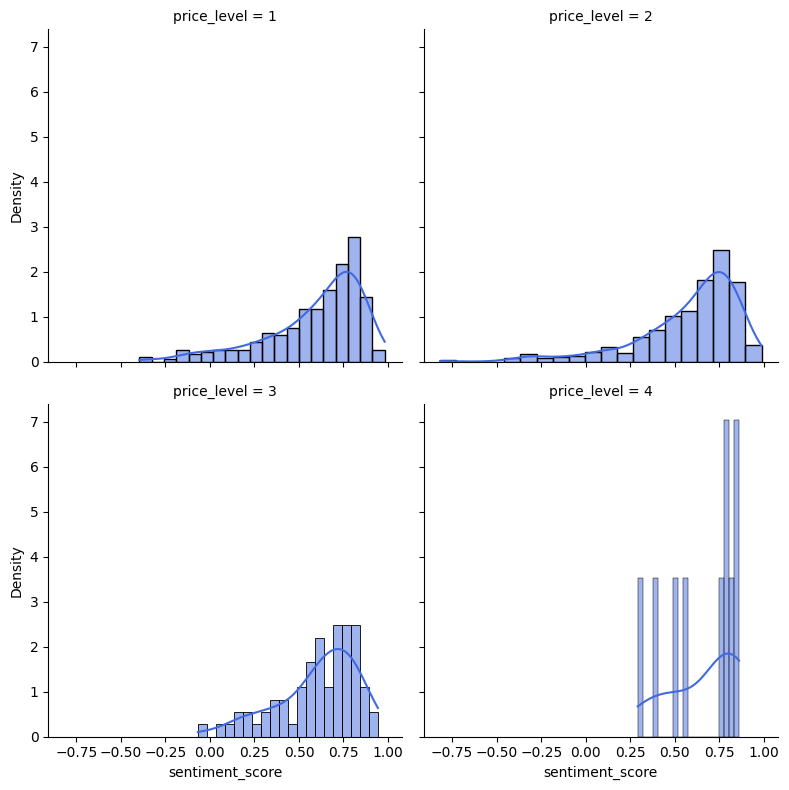

In [ ]:
# Create a FacetGrid for multiple histograms, normalizing each price level
g = sns.FacetGrid(df, col="price_level", col_wrap=2, height=4, sharex=True, sharey=True)

# Plot sentiment score distribution with density normalization
g.map(sns.histplot, "sentiment_score", bins=20, stat="density", kde=True, color="royalblue", edgecolor='black')

# Adjust layout and show plot
plt.show()